<a href="https://colab.research.google.com/github/Neoneto/Coding_Dojo_Week7/blob/main/Classification_Metrics_(Practice).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Metrics (Practice)



Submitted by Kenneth Alaba

## Pre-processing

In [35]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix,roc_auc_score, plot_roc_curve

from sklearn.metrics import plot_confusion_matrix

In [3]:
# Load the data

## Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

## Opening the file
filename = '/content/drive/My Drive/Coding Dojo/07 Week 7: Classification Models/bank_modified.csv'

## Storing the data in df
df = pd.read_csv(filename, )

# display first few rows
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,y_yes
0,30,1787,79,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1,33,4789,220,1,339,4,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0
2,35,1350,185,1,330,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
3,30,1476,199,4,-1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0
4,59,0,226,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0


In [4]:
# Check the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  4521 non-null   int64
 1   balance              4521 non-null   int64
 2   duration             4521 non-null   int64
 3   campaign             4521 non-null   int64
 4   pdays                4521 non-null   int64
 5   previous             4521 non-null   int64
 6   job_blue-collar      4521 non-null   int64
 7   job_entrepreneur     4521 non-null   int64
 8   job_housemaid        4521 non-null   int64
 9   job_management       4521 non-null   int64
 10  job_retired          4521 non-null   int64
 11  job_self-employed    4521 non-null   int64
 12  job_services         4521 non-null   int64
 13  job_student          4521 non-null   int64
 14  job_technician       4521 non-null   int64
 15  job_unemployed       4521 non-null   int64
 16  job_unknown          452

In [6]:
df['y_yes'].value_counts(normalize = True)

0    0.88476
1    0.11524
Name: y_yes, dtype: float64

This tells us that the data is unbalanced

In [10]:
# Define the target and features
X = df.drop(columns=['y_yes'])
y = df['y_yes']

In [11]:
# Split into train and test sets
X_train, X_test, y_train, y_test  = train_test_split(X, y, random_state=42, stratify = y)

## Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Test accuracy = 0.883
Test sensitivity = 0.131
Test specificity = 0.981
Training AUC: 0.8667978840346612
Testing AUC: 0.8368170291247214


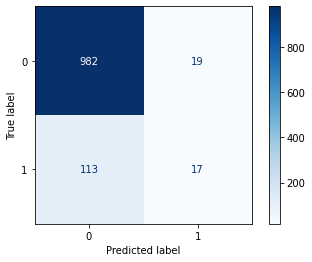

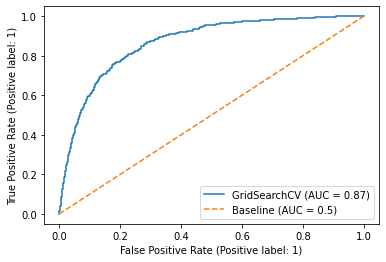

In [42]:
# Make an instance of the model
logreg = LogisticRegression(solver = 'liblinear' )
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify = y)
# Scaling logistic regression
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Applies gridsearch, adapted from the solution
params = {'penalty': ['l1', 'l2'],
          'C': [0.0001, 0.001, 0.01],
          'class_weight': [None, 'balanced']}

# grid search to find best hyperparameters
gs = GridSearchCV(logreg, params, cv = 5)

# train the model applying the hyperparameters obtained using gs
gs.fit(X_train, y_train)


lr_pred = gs.predict(X_test)

# Evaluate Logreg model
plot_confusion_matrix(gs, X_test, y_test, cmap = 'Blues');

# Calculate the confusion matrix
confusion_test = confusion_matrix(y_test, lr_pred)

TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

# Calculate the metrics
accuracy = accuracy_score(y_test, lr_pred)
sensitivity = TP / float(TP+FN)
specificity = TN / float(TN+FP)

# Print the metrics
print(f'Test accuracy = {accuracy:.3f}')
print(f'Test sensitivity = {sensitivity:.3f}')
print(f'Test specificity = {specificity:.3f}')

# Calculate AUC for both training and testing sets
print(f'Training AUC: {roc_auc_score(y_train, gs.predict_proba(X_train)[:,1])}')
print(f'Testing AUC: {roc_auc_score(y_test, gs.predict_proba(X_test)[:,1])}')

# Visualize the ROC curve
plot_roc_curve(gs, X_train, y_train)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();

In [41]:
y_test.value_counts(normalize = True)

0    0.885057
1    0.114943
Name: y_yes, dtype: float64

1.Which metric is going to be best to evaluate your classification model for this dataset and why? Hint: think about what each metric means in this specific scenario. What metric is going to help the bank the most?
The best metric depends on the goal of the bank for analyzing the data. For example, assuming that they want to increase the number of subscription without considering the cost of the campaign, in this case, we will be interested in the features that will cause a customer to subscribe to replicate those and the features that will cause a customer to not subscribe to avoid those. In this scenario, we will be interested in true negatives and true positives which can be quantified by high sensitivity and specificity metrics.


Compare your model's accuracy with the baseline model. Do you see any problems here?
What are other ways you could improve this model?
There is only a small difference between the accuracies of the optimized model and the baseline model. One possible reason is that the data is unbalance with majority having a y_yes value of 0. This could be solved by a more advanced algorithm.